### Exploratory Data Analysis

#### <div>Problem: You are provided all kinds of crime details during first six month of the year 2017 in Colombo Municipal Council area (1-15 divisions). Further details of schools and police stations are also provided. You may use graphs, charts or map, where necessary and explain your answer for following questions.

1. What are divisions having highest overall crime densities?
2. What is most occurring crime in each division?
3. Which month occurred the highest number of crimes in each division?
4. Prove/disprove the statement – “Drug occurrence mostly occurs in the areas lesser than 150m from school”.

</div>

##### Importing Libraries and Data.

In [3]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium
import numpy as np
import plotly.express as px
import geopy.distance
import geopandas as gpd

In [5]:
#Enabling option to view all rows/columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [58]:
#Getting Divisions Location
C_Map = gpd.read_file("Colombo_zone.shp")
C_Map = C_Map.to_crs(4326)
C_Map['lon'] = C_Map.centroid.x  
C_Map['lat'] = C_Map.centroid.y

C:\Users\PC\AppData\Local\Temp/ipykernel_1568/3111609230.py:4: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\PC\AppData\Local\Temp/ipykernel_1568/3111609230.py:5: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [6]:
#Fetching Crime Data
crime_data = pd.read_csv("Crimes_2017.csv")
crime_data.head()

,Police_Stn,Type,Latitude,Longitude,Time,Year,Month,Date
0,Kurunduwaththa,Theft,6.9134,79.8736,1600,2017,1,1
1,Kotahena,Murder,6.9537,79.8605,2000,2017,1,2
2,Maradana,Assult,6.9254,79.8625,2330,2017,1,2
3,Pettha,Theft,6.9392,79.8537,1620,2017,1,2
4,Armour_Street,Robbery,6.9414,79.8577,1700,2017,1,3


In [7]:
#Checking null values (if any) and data type
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Police_Stn  500 non-null    object 
 1   Type        500 non-null    object 
 2   Latitude    500 non-null    float64
 3   Longitude   500 non-null    float64
 4   Time        500 non-null    int64  
 5   Year        500 non-null    int64  
 6   Month       500 non-null    int64  
 7   Date        500 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 31.4+ KB


In [8]:
#Fetching Police Data
police_data = pd.read_csv("Police_Colombo_2017.csv")
police_data.head()

,Name,Type,Latitude,Longitude,House Brake,Robbary,Theft,Rape,Murder,Assult,Druges
0,Bambalapitiya,police,6.8921,79.8556,14,18,14,2,3,2,4
1,Borella,police,6.9149,79.8783,22,16,18,1,3,6,6
2,Wellawatte,police,6.8733,79.8614,22,12,22,1,0,1,8
3,Slave Island,police,6.9276,79.8493,18,12,12,0,3,5,2
4,Fort,police,6.9330,79.8456,3,6,8,1,0,3,4


In [9]:
#Checking null values (if any) and data type
police_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         17 non-null     object 
 1   Type         17 non-null     object 
 2   Latitude     17 non-null     float64
 3   Longitude    17 non-null     float64
 4   House Brake  17 non-null     int64  
 5   Robbary      17 non-null     int64  
 6   Theft        17 non-null     int64  
 7   Rape         17 non-null     int64  
 8   Murder       17 non-null     int64  
 9   Assult       17 non-null     int64  
 10  Druges       17 non-null     int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.6+ KB


In [10]:
#Fetching School Data
school_data = pd.read_csv("School_Colombo.csv")
school_data.head()

,Name,Type,Longitude,Latitude
0,Kingston College International,school,79.8624,6.8799
1,Anula Vidyalaya,school,79.8846,6.8719
2,St. Lawrence Convent,school,79.8622,6.8756
3,St. Clares Girl School,school,79.8619,6.8766
4,Lumbini Balika Vidyalaya,school,79.8642,6.8765


In [11]:
#Checking null values (if any) and data type
school_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       92 non-null     object 
 1   Type       92 non-null     object 
 2   Longitude  92 non-null     float64
 3   Latitude   92 non-null     float64
dtypes: float64(2), object(2)
memory usage: 3.0+ KB


##### Observation 1: Finding Crime densities of all divisions (6 months).

In [12]:
#Using groupby() method
highest_crime_6_months = crime_data.groupby("Police_Stn")["Type"].count()
highest_crime_6_months

Police_Stn
Armour_Street     37
Bambalapitiya     24
Borella           32
Dematagoda        35
Fort               9
Grand Pass        61
Kirullapone       26
Kollupitiya       22
Kotahena          35
Kurunduwaththa     7
Maligawatta       35
Maradana          28
Modara            42
Narahenpita       20
Pettha            35
Slave Island      22
Wellawatta        30
Name: Type, dtype: int64

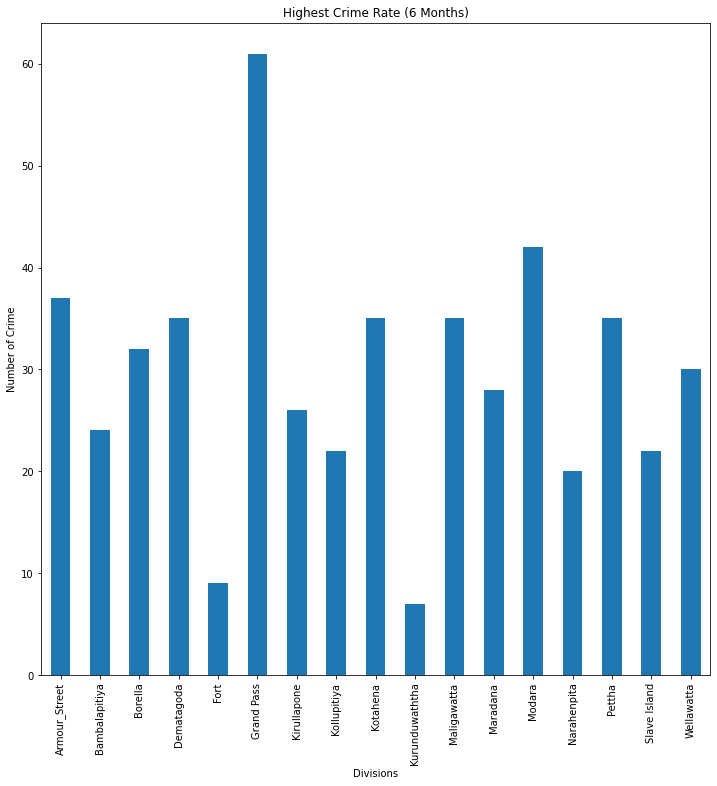

In [13]:
#Plotting Bar graph
highest_crime_6_months_graph = highest_crime_6_months.plot(kind="bar", title = "Highest Crime Rate (6 Months)", xlabel = "Divisions", ylabel="Number of Crime", figsize=(12,12))
plt.show()

##### Observation 2: Finding Crime densities of all divisions (whole 2017).

In [14]:
#Made copy of police data
police_data_copy = police_data.copy()
#Made variable of total crimes
police_data_copy["Total Crimes"] = police_data_copy["House Brake"] + police_data_copy["Robbary"] + police_data_copy["Theft"] + police_data_copy["Rape"] + police_data_copy["Assult"] + police_data_copy["Druges"]
police_data_copy.head()

,Name,Type,Latitude,Longitude,House Brake,Robbary,Theft,Rape,Murder,Assult,Druges,Total Crimes
0,Bambalapitiya,police,6.8921,79.8556,14,18,14,2,3,2,4,54
1,Borella,police,6.9149,79.8783,22,16,18,1,3,6,6,69
2,Wellawatte,police,6.8733,79.8614,22,12,22,1,0,1,8,66
3,Slave Island,police,6.9276,79.8493,18,12,12,0,3,5,2,49
4,Fort,police,6.9330,79.8456,3,6,8,1,0,3,4,25


In [52]:
#Calculated latitude and longitude
center_lat = C_Map.mean().lat
center_long = C_Map.mean().lon
fig = folium.Map(location=[center_lat,center_long])
#Plotting the map according to given values, the size of circle indicates the magnitude
for i in range(len(police_data_copy)):
    folium.CircleMarker(location=[police_data_copy["Latitude"][i],police_data_copy["Longitude"][i]], popup="Total Crimes: " + str(police_data_copy["Total Crimes"].values[i]),tooltip=police_data_copy["Name"][i],radius=float(police_data_copy["Total Crimes"].values[i]/10), color="black",
        fill_color="black").add_to(fig)
fig

C:\Users\PC\AppData\Local\Temp/ipykernel_1568/2260073091.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\PC\AppData\Local\Temp/ipykernel_1568/2260073091.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



##### Observation 3: Making small sets of each division.

In [43]:
#Diving crime dataset according to the given divisions
Armour_Street_crime = crime_data[crime_data["Police_Stn"].str.contains('Armour_Street')]
Bambalapitiya_crime = crime_data[crime_data["Police_Stn"].str.contains('Bambalapitiya')]
Borella_crime = crime_data[crime_data["Police_Stn"].str.contains('Borella')]
Dematagoda_crime = crime_data[crime_data["Police_Stn"].str.contains('Dematagoda')]
Fort_crime = crime_data[crime_data["Police_Stn"].str.contains('Fort')]
Grand_Pass_crime = crime_data[crime_data["Police_Stn"].str.contains('Grand Pass')]
Kirullapone_crime = crime_data[crime_data["Police_Stn"].str.contains('Kirullapone')]
Kollupitiya_crime = crime_data[crime_data["Police_Stn"].str.contains('Kollupitiya')]
Kotahena_crime = crime_data[crime_data["Police_Stn"].str.contains('Kotahena')]
Kurunduwaththa_crime = crime_data[crime_data["Police_Stn"].str.contains('Kurunduwaththa')]
Maligawatta_crime = crime_data[crime_data["Police_Stn"].str.contains('Maligawatta')]
Maradana_crime = crime_data[crime_data["Police_Stn"].str.contains('Maradana')]
Modara_crime = crime_data[crime_data["Police_Stn"].str.contains('Modara')]
Narahenpita_crime = crime_data[crime_data["Police_Stn"].str.contains('Narahenpita')]
Pettha_crime = crime_data[crime_data["Police_Stn"].str.contains('Pettha')]
Slave_Island_crime = crime_data[crime_data["Police_Stn"].str.contains('Slave Island')]
Wellawatta_crime = crime_data[crime_data["Police_Stn"].str.contains('Wellawatta')]
divisions = [Armour_Street_crime, Bambalapitiya_crime, Borella_crime, Dematagoda_crime, Fort_crime, Grand_Pass_crime, Kirullapone_crime, Kollupitiya_crime, Kotahena_crime, Kurunduwaththa_crime, 
Maligawatta_crime,Maradana_crime, Modara_crime, Narahenpita_crime, Pettha_crime, Slave_Island_crime,Wellawatta_crime]

##### Observation 4: Developing Pie Charts showing different crime rates in each division.

In [57]:
#PLotting Pie-chart
for i in divisions:
    fig = px.pie(i, names="Type", title = "Different crime rate in division {division}".format(division=i["Police_Stn"].unique()[0]), hole=.3)
    fig.show()

In [ ]:
# Developing table of same data which is used in above graph.
most_occuring_crime = crime_data.groupby("Police_Stn")["Type"].value_counts()
most_occuring_crime.to_frame().transpose()

Police_Stn Armour_Street                                            \
Type               Theft Robbery Drugs House Braking Murder Assult   
Type                  13      12     4             3      3      2   

Police_Stn Bambalapitiya                                             Borella  \
Type             Robbery House Braking Theft Drugs Murder Rape House Braking   
Type                   8             6     6     2      1    1            10   

Police_Stn                                           Dematagoda                \
Type       Theft Robbery Drugs Rape Assult Murder House Braking Theft Robbery   
Type           8       7     3    2      1      1            10    10       8   

Police_Stn                           Fort                                     \
Type       Assult Murder Rape Drugs Theft Drugs Robbery Assult House Braking   
Type            2      2    2     1     3     2       2      1             1   

Police_Stn Grand Pass                                                 \
Type            Theft Robbery Murder Assult House Braking Drugs Rape   
Type               18      11     10      8             8     4    2   

Police_Stn   Kirullapone                      Kollupitiya                \
Type       House Braking Robbery Theft Assult       Theft House Braking   
Type                  12      10     3      1           8             6   

Police_Stn                      Kotahena                                      \
Type       Robbery Drugs Assult    Theft House Braking Robbery Assult Murder   
Type             5     2      1       12             8       5      4      3   

Police_Stn            Kurunduwaththa                           Maligawatta  \
Type       Drugs Rape        Robbery House Braking Drugs Theft      Murder   
Type           2    1              3             2     1     1          10   

Police_Stn                                               Maradana        \
Type       Assult Drugs Theft House Braking Robbery Rape  Robbery Theft   
Type            8     6     4             3       3    1        8     6   

Police_Stn                                        Modara                       \
Type       Assult House Braking Drugs Rape House Braking Theft Robbery Assult   
Type            5             5     3    1            10    10       9      5   

Police_Stn                     Narahenpita                            Pettha  \
Type       Murder Drugs Rape House Braking Robbery Theft Drugs Murder  Theft   
Type            5     2    1             8       5     4     2      1     14   

Police_Stn                                          Slave Island          \
Type       Robbery House Braking Murder Drugs Rape House Braking Robbery   
Type             8             5      5     2    1             8       5   

Police_Stn                              Wellawatta                      
Type       Theft Assult Drugs Murder House Braking Theft Drugs Robbery  
Type           5      2     1      1            10    10     5       5

##### Observation 5: Distribution of Number of crimes according to first 6 months of 2017.

In [ ]:
# Making Bar chart
for i in divisions:
    fig = px.bar(i["Month"].value_counts(), title = "Highest number of crimes according to months in each division {division}".format(division=i["Police_Stn"].unique()[0]), labels={"index":"Months", "value":"Rate of crimes"})
    fig.show()

In [ ]:
# Making table of same data as used in above graph
Highest_no_of_crime_month = crime_data.groupby("Police_Stn")["Month"].value_counts()
Highest_no_of_crime_month.to_frame().transpose()

Police_Stn Armour_Street                Bambalapitiya                Borella  \
Month                  1  2  3  6  4  5             2  3  4  5  1  6       2   
Month                 11  9  7  4  3  3             5  5  4  4  3  3      11   

Police_Stn                Dematagoda                Fort                 \
Month       1  3  4  5  6          4  3  5  1  2  6    6  2  1  3  4  5   
Month       7  7  3  3  1          9  8  7  5  3  3    3  2  1  1  1  1   

Police_Stn Grand Pass                  Kirullapone                Kollupitiya  \
Month               2   5   3  1  4  6           1  2  3  5  4  6           2   
Month              12  12  10  9  9  9           7  6  6  3  2  2           6   

Police_Stn                Kotahena                Kurunduwaththa           \
Month       5  6  3  1  4        2  3  5  4  6  1              1  3  5  6   
Month       5  4  3  2  2        9  8  7  6  3  2              2  2  2  1   

Police_Stn Maligawatta                Maradana                Modara           \
Month                2  1  3  6  4  5        1  4  5  2  3  6      2  1  4  5   
Month                7  6  6  6  5  5        7  6  5  4  3  3     14  6  6  6   

Police_Stn       Narahenpita                Pettha                 \
Month       6  3           2  3  1  4  5  6      4  2  3  6  5  1   
Month       6  4           6  5  4  2  2  1      9  8  7  5  4  2   

Police_Stn Slave Island             Wellawatta                 
Month                 3  4  5  2  6          2  4  5  1  3  6  
Month                 7  5  4  3  3          7  6  5  4  4  4

##### Observation 6: Plotting school data and crime data where crime = "Drugs" on a map.

In [1]:
# Making subset data of crime=Drug
crime_drug = crime_data[crime_data["Type"].str.contains("Drugs")]
fig = folium.Map(location=[center_lat,center_long])
#Plotting School Data
for i in range(len(school_data)):
    folium.CircleMarker(location=[school_data["Latitude"][i],school_data["Longitude"][i]], popup="School Name: " + str(school_data["Name"].values[i]),radius = 10, color="orange",
        fill_color="black").add_to(fig)
#Plotting Drug Data
for i in range(len(crime_drug)):
    folium.CircleMarker(location=[crime_drug.iloc[i]["Latitude"],crime_drug.iloc[i]["Longitude"]],radius = 10, color="blue",
        fill_color="black").add_to(fig)
fig

NameError: name 'crime_data' is not defined

##### Observation 7: Measuring distance between school data and drug data.

In [ ]:
for i in range(len(school_data)):
    for j in range(len(crime_drug)):
        coords_1 = (school_data.iloc[i]["Latitude"],school_data.iloc[i]["Longitude"])
        coords_2 = (crime_drug.iloc[j]["Latitude"],crime_drug.iloc[j]["Longitude"])
        distance = geopy.distance.geodesic(coords_1, coords_2).m
        if distance<150:
            print("Distance in Meters: ",distance)

Distance in Meters:  39.86644238848279
Distance in Meters:  22.11804243409922
Distance in Meters:  95.11358713729506
Distance in Meters:  62.5378430578582
Distance in Meters:  126.08644158359606
Distance in Meters:  80.46142054642687
Distance in Meters:  89.09825837059277
Distance in Meters:  123.64103042473923
Distance in Meters:  133.16790211328373
Distance in Meters:  125.07520921980586
Distance in Meters:  89.11145142257406
Distance in Meters:  133.54489801131965


### Findings/Results

##### Q1: What are divisions having highest overall crime densities?

##### Answer: Grand Pass have the highest crime density. On the second number, Modara has the highest crime density.

##### Q2: What is most occurring crime in each division?

##### Answer: 
##### 1. Armour_Street     (Theft=13)
##### 2. Bambalapitiya     (Robbery=8)
##### 3. Borella           (House Breaking=10)
##### 4. Dematagoda        (House Breaking=10)
##### 5. Fort              (Theft=3)
##### 6. Grand Pass        (Theft=18)
##### 7. Kirullapone       (House Breaking=12)
##### 8. Kollupitiya       (Theft=8)
##### 9. Kotahena          (Theft=12)
##### 10. Kurunduwaththa   (Robbery=3)
##### 11. Maligawatta      (Murder=10)
##### 12. Maradana         (Robbery=8)
##### 13. Modara           (House Breaking=10)
##### 14. Narahenpita      (House Breaking=8)
##### 15. Pettha           (Theft=14)
##### 16. Slave Island     (House Breaking=8)
##### 17. Wellawatta       (House Breaking=10)

##### Q3: Which month occurred the highest number of crimes in each division?

##### Answer: 
##### 1. Armour_Street     (11 crimes took place in January 2017)
##### 2. Bambalapitiya     (5 crimes took place in February 2017)
##### 3. Borella           (11 crimes took place in February 2017)
##### 4. Dematagoda        (9 crimes took place in April 2017)
##### 5. Fort              (6 crimes took place in March 2017)
##### 6. Grand Pass        (12 crimes took place in February 2017)
##### 7. Kirullapone       (7 crimes took place in January 2017)
##### 8. Kollupitiya       (6 crimes took place in February 2017)
##### 9. Kotahena          (9 crimes took place in February 2017)
##### 10. Kurunduwaththa   (2 crimes took place in January 2017)
##### 11. Maligawatta      (7 crimes took place in February 2017)
##### 12. Maradana         (7 crimes took place in January 2017)
##### 13. Modara           (6 crimes took place in January 2017)
##### 14. Narahenpita      (6 crimes took place in February 2017)
##### 15. Pettha           (9 crimes took place in April 2017)
##### 16. Slave Island     (7 crimes took place in March 2017)
##### 17. Wellawatta       (7 crimes took place in February 2017)

##### Q4: Prove/disprove the statement – “Drug occurrence mostly occurs in the areas lesser than 150m from school”.

##### Answer: This statement is being disproved according to given data because drug occurrence mostly occurs in the areas greater than 150m from school. Only 12 Drug cases occurs in area lesser than 150m from school.